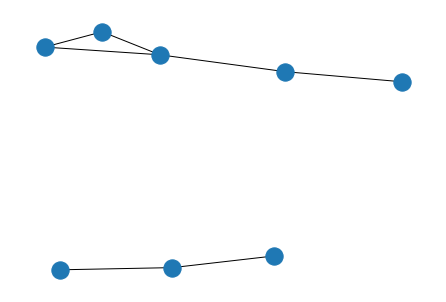

In [9]:
import networkx as nx
G = nx.Graph()


G.add_edge(3, 4)
G.add_edge(1, 3)
G.add_edge(5, 6)
G.add_edge(5, 9)
G.add_edge(7, 8)
G.add_edge(1, 8)
G.add_edge(1, 4)

nx.draw(G)